In [1]:
! pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 30.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.4/932.4 kB 22.6 MB/s eta 0:00:0000:01


In [11]:
! pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.7 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 54.3 MB/s eta 0:00:00:00:0100:01
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=277134 sha256=700304b5b6d9b8573f682d760554a7db502e38b6239388ee842b29f9c25f09ca
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [3]:
! pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import sagemaker
import os
import process
import os
import yaml
import pandas as pd
import boto3
from pathlib import Path
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker import get_execution_role
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
;

INFO:matplotlib.font_manager:generated new fontManager


''

## Process the data

In [7]:
import yfinance

import yfinance as yf

amzn = yf.Ticker("AMZN")

df = amzn.history(start = '2015-01-01', end = '2023-12-31') 

df.pop('Dividends')
df.pop('Stock Splits')
#df.reset_index(inplace = True)

Date
2015-01-02 00:00:00-05:00    0.0
2015-01-05 00:00:00-05:00    0.0
2015-01-06 00:00:00-05:00    0.0
2015-01-07 00:00:00-05:00    0.0
2015-01-08 00:00:00-05:00    0.0
                            ... 
2023-12-22 00:00:00-05:00    0.0
2023-12-26 00:00:00-05:00    0.0
2023-12-27 00:00:00-05:00    0.0
2023-12-28 00:00:00-05:00    0.0
2023-12-29 00:00:00-05:00    0.0
Name: Stock Splits, Length: 2264, dtype: float64


## EDA

df.head()

In [89]:
eda = df.copy()

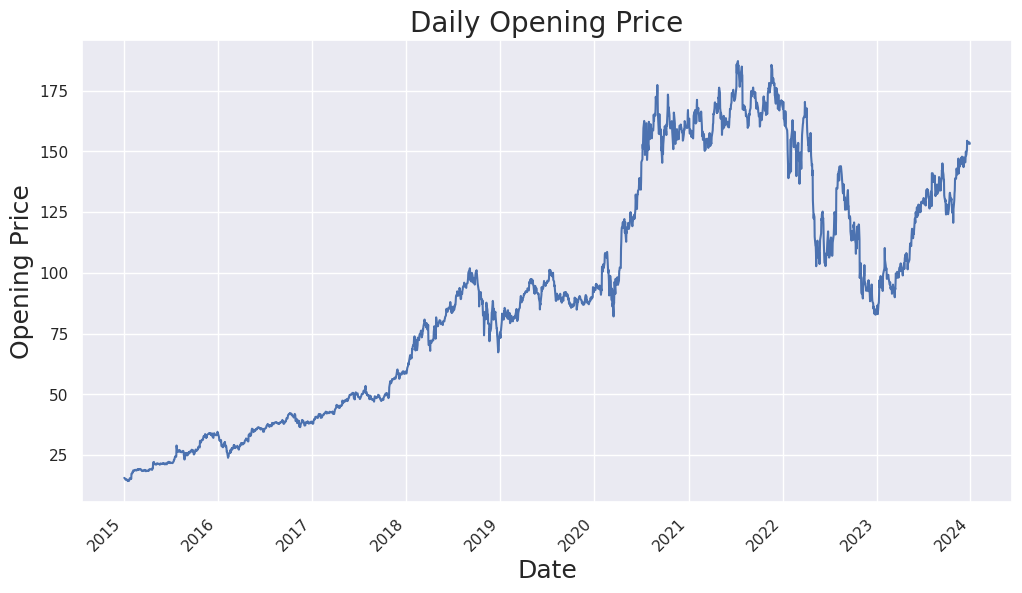

In [90]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title('Daily Opening Price', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Opening Price', fontsize=18)
plt.plot(eda.Open)
!

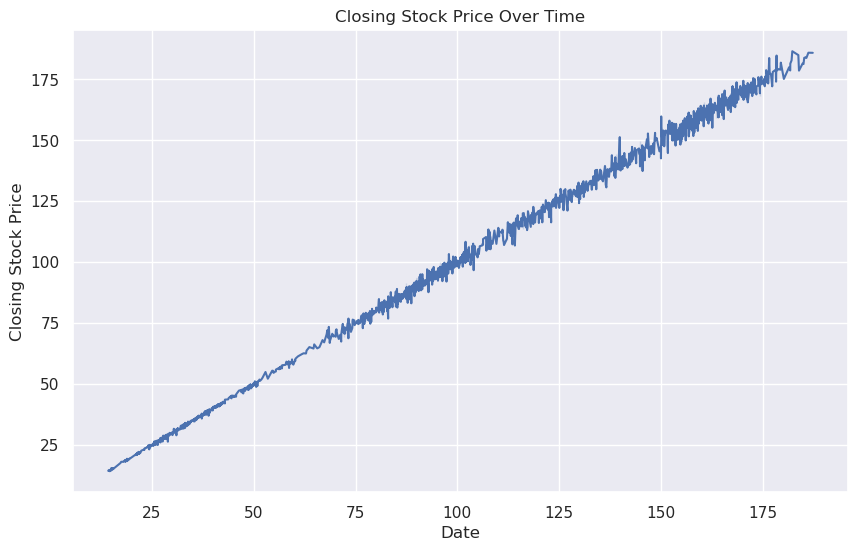

In [91]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Open', y='Close', data=eda)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

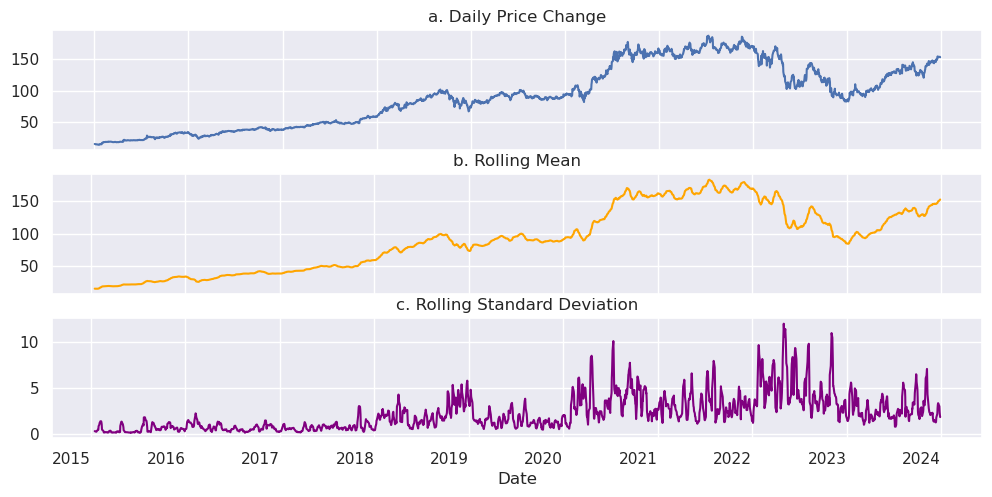

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=1)
eda['Open'].plot(ax=axes[0], figsize=(12,6), rot=90, title='a. Daily Price Change', sharex=True)
eda['Open'].rolling(10).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
eda['Open'].rolling(10).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

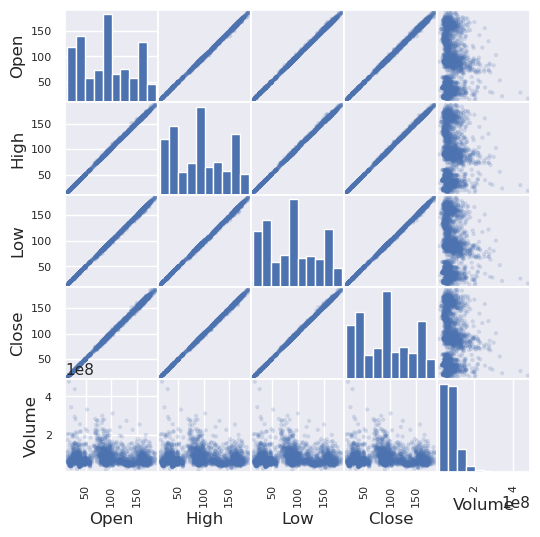

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(eda, alpha=0.2, figsize=(6, 6))
plt.show()

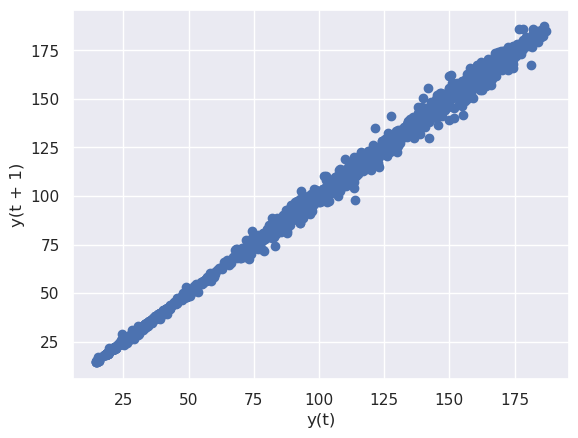

In [94]:
# create a lag plot to check for autocorrelation in a numeric column
from pandas.plotting import lag_plot
lag_plot(eda['Open'])
plt.show()

In [95]:
eda.reset_index(inplace = True)
eda['year'] = eda['Date'].dt.year

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


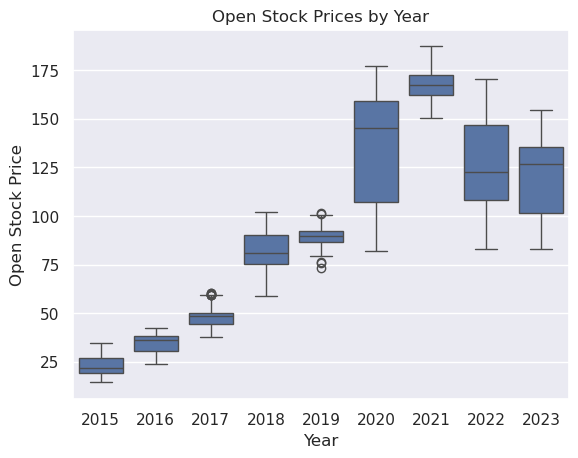

In [97]:

sns.boxplot(x = 'year', y='Open', data=eda)
plt.title('Open Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Open Stock Price')
plt.show();

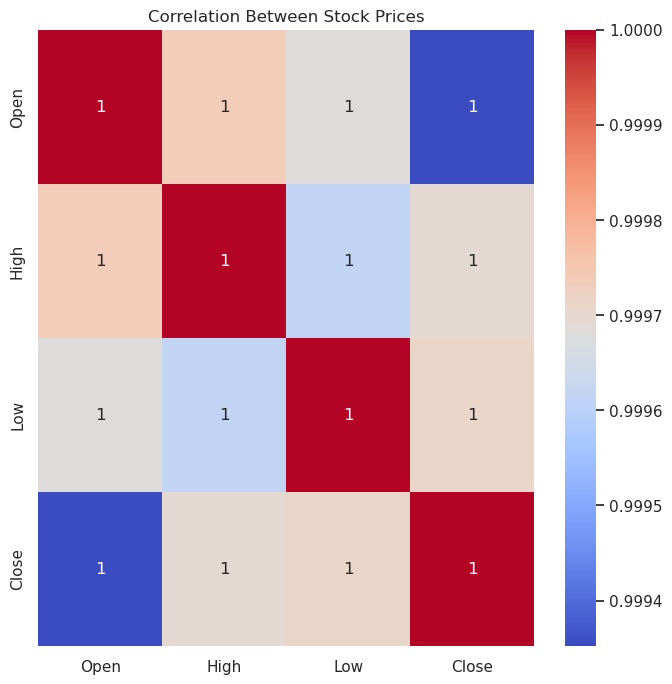

In [98]:
corr = eda[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation.

We can start by visualizing the distribution of the target variable, which in this case is the closing stock price. We can use a histogram to visualize the distribution.

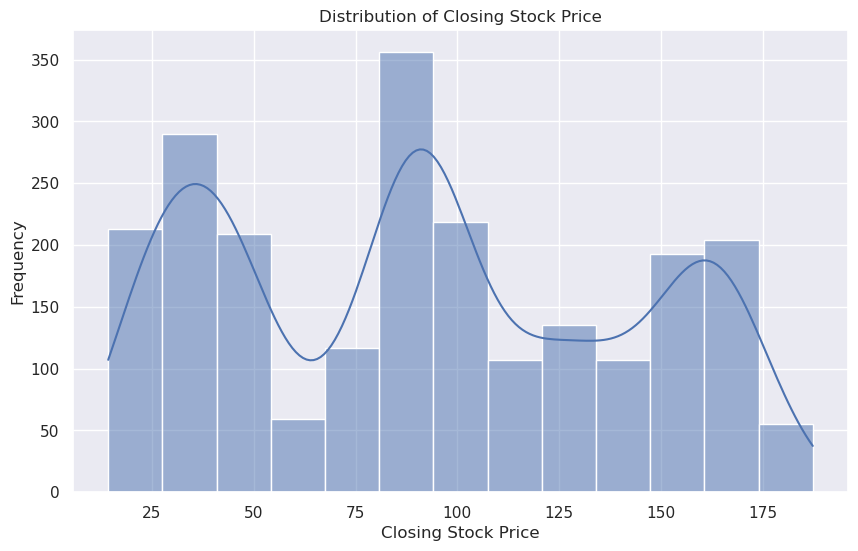

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(eda['Open'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

## Create our Multivariable Linear Regression Base Line Model

In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000
2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,55484000
2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,70380000
2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,52806000
2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,61768000


In [10]:
trainsize = math.ceil(len(df) * 0.7)
train_df = df.iloc[:trainsize, :]
test_df = df.iloc[trainsize:, :]

X_train = train_df.iloc[:,1:]
y_train = train_df['Open']

X_test = test_df.iloc[:,1:]
y_test = test_df['Open']

In [13]:
#Fitting the Multiple Linear Regression model
base_model = LinearRegression().fit(X_train, y_train)

In [14]:
pred= base_model.predict(X_test) 

In [15]:
# Evaluate Model
baseline_mae = mean_absolute_error(y_test, pred)
baseline_mse = mean_squared_error(y_test, pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, pred))
baseline_r2 = r2_score(y_test, pred)

print('Mean Absolute Error:', baseline_mae)
print('Mean Square Error:', baseline_mse)
print('Root Mean Square Error:', baseline_rmse)
print('R2:', baseline_r2)

Mean Absolute Error: 0.7624760049071997
Mean Square Error: 0.970390232979187
Root Mean Square Error: 0.9850838710379878
R2: 0.9987531559953603


## Autogluon Model

In [4]:
from autogluon.tabular import TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [15]:
import yfinance

import yfinance as yf

amzn = yf.Ticker("AMZN")

df = amzn.history(start = '2015-01-01', end = '2023-12-31') 

df.pop('Dividends')
df.pop('Stock Splits')
#df.reset_index(inplace = True)

Date
2015-01-02 00:00:00-05:00    0.0
2015-01-05 00:00:00-05:00    0.0
2015-01-06 00:00:00-05:00    0.0
2015-01-07 00:00:00-05:00    0.0
2015-01-08 00:00:00-05:00    0.0
                            ... 
2023-12-22 00:00:00-05:00    0.0
2023-12-26 00:00:00-05:00    0.0
2023-12-27 00:00:00-05:00    0.0
2023-12-28 00:00:00-05:00    0.0
2023-12-29 00:00:00-05:00    0.0
Name: Stock Splits, Length: 2264, dtype: float64

In [16]:
df['datetime'] = df.index
#df.datetime = pd.Timestamp(df['datetime'])
df.reset_index(inplace=True)
df = df.drop('Date',axis = 1)
first_column = df.pop('datetime')
df.insert(0, 'datetime', first_column) 
df.head()

,datetime,Open,High,Low,Close,Volume
0,2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000
1,2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,55484000
2,2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,70380000
3,2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,52806000
4,2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,61768000


In [18]:
df.rename(columns = {'Date': 'datetime'}, inplace = True)
df['datetime'] = pd.to_datetime(df['datetime'])
#df[ 'datetime'] = df[ 'datetime'].dt.tz_localize(None)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                           
---  ------    --------------  -----                           
 0   datetime  2264 non-null   datetime64[ns, America/New_York]
 1   Open      2264 non-null   float64                         
 2   High      2264 non-null   float64                         
 3   Low       2264 non-null   float64                         
 4   Close     2264 non-null   float64                         
 5   Volume    2264 non-null   int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 106.2 KB


In [19]:
df.head()

,datetime,Open,High,Low,Close,Volume
0,2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000
1,2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,55484000
2,2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,70380000
3,2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,52806000
4,2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,61768000


In [20]:
test = df.iloc[(int(df.shape[0]*.7)):]
train = df.iloc[:(int(df.shape[0]*.7))]

In [22]:
predictor = TabularPredictor(label="Open",problem_type="regression", eval_metric="mean_squared_error").fit(
    train_data=train,
    time_limit=300,
    presets="medium_quality",
        num_bag_folds=10,
    num_stack_levels = 3
    
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240321_173934"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240321_173934"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Feb 13 18:46:41 UTC 2024
CPU Count:          2
Memory Avail:       1.76 GB / 3.76 GB (46.7%)
Disk Space Avail:   1.96 GB / 4.78 GB (41.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1584
Train Data Columns: 5
Label Column:       Open
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1798.54 MB
	Train Data (Original)  Memory Usage: 0.06 MB (0.0% of available memory)


In [23]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-0.781766,mean_squared_error,5.950220,203.617578,0.001472,0.698105,5,True,13
1,WeightedEnsemble_L2,-0.798593,mean_squared_error,3.562637,85.713998,0.001189,0.407599,2,True,5
2,LightGBM_BAG_L1,-0.813164,mean_squared_error,0.059469,25.597489,0.059469,25.597489,1,True,4
3,WeightedEnsemble_L4,-0.978240,mean_squared_error,7.087093,250.635444,0.002026,0.219305,4,True,11
4,LightGBM_BAG_L3,-0.986032,mean_squared_error,5.948748,202.919473,0.220824,35.160874,3,True,10
5,WeightedEnsemble_L3,-1.035946,mean_squared_error,5.729084,167.956375,0.001160,0.197777,3,True,8
6,LightGBM_BAG_L2,-1.051882,mean_squared_error,3.610588,111.731415,0.049139,26.425016,2,True,7
7,LightGBMXT_BAG_L1,-1.497118,mean_squared_error,3.450730,59.680393,3.450730,59.680393,1,True,3
8,LightGBMXT_BAG_L2,-1.652689,mean_squared_error,5.678785,141.333582,2.117337,56.027184,2,True,6
9,LightGBMXT_BAG_L3,-1.747608,mean_squared_error,6.864243,215.255265,1.136319,47.496666,3,True,9


In [24]:
y_test = test.pop('Open')
y_pred = predictor.predict(test)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

In [25]:
perf

{'mean_squared_error': -81.44673385599222,
 'root_mean_squared_error': -9.024784421579954,
 'mean_absolute_error': -7.152641689076143,
 'r2': 0.8954072544163412,
 'pearsonr': 0.9948416109929431,
 'median_absolute_error': -6.4714508056640625}

## Hyperparamter Tuning Autogluon Model

In [26]:
import autogluon.core as ag
from autogluon.common import space

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1) # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),
    'boosting': space.Categorical('gbdt', 'dart', 'rf','gross')# number of leaves in trees (integer hyperparameter)
}

knn_options = { 'n_neighbors': space.Int(lower=1, upper=10, default=5),
               'weights': 'uniform'}
               

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                    'KNN': knn_options
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 60  # train various models for ~2 min
num_trials = 2  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [27]:
predictor_new_hpo = TabularPredictor(label="Open",problem_type="regression", eval_metric="mean_squared_error").fit(
    train_data=train,

    presets="medium_quality",
 time_limit=300,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
        num_bag_folds=10,
    num_stack_levels = 3
)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L4... Skipping this model.
Completed 1/5 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L5 ... Training model for up to 299.86s of the 19.77s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.629, 'LightGBM_BAG_L3/T1': 0.21, 'KNeighbors_BAG_L1/T1': 0.065, 'LightGBM_BAG_L4/T1': 0.065, 'KNeighbors_BAG_L1/T2': 0.032}
	-0.9093	 = Validation score   (-mean_squared_error)
	0.76s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 281.21s ... Best model: "WeightedEnsemble_L5"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240321_174712")


In [29]:
predictor_new_hpo.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-0.909260,mean_squared_error,0.003284,129.531664,0.001211,0.760976,5,True,10
1,WeightedEnsemble_L2,-0.927691,mean_squared_error,0.001453,36.417299,0.001165,0.323518,2,True,4
2,LightGBM_BAG_L1/T1,-0.954951,mean_squared_error,0.000110,35.986939,0.000110,35.986939,1,True,3
3,LightGBM_BAG_L3/T1,-1.069437,mean_squared_error,0.000604,96.014583,0.000099,27.651010,3,True,7
4,WeightedEnsemble_L4,-1.069437,mean_squared_error,0.001446,96.023920,0.000842,0.009337,4,True,8
5,LightGBM_BAG_L4/T1,-1.136186,mean_squared_error,0.002073,128.770689,0.001469,32.756106,4,True,9
6,LightGBM_BAG_L2/T1,-1.139556,mean_squared_error,0.000505,68.363573,0.000217,32.269793,2,True,5
7,WeightedEnsemble_L3,-1.139556,mean_squared_error,0.001601,68.371636,0.001096,0.008063,3,True,6
8,KNeighbors_BAG_L1/T1,-2.645702,mean_squared_error,0.000121,0.070730,0.000121,0.070730,1,True,1
9,KNeighbors_BAG_L1/T2,-2.651773,mean_squared_error,0.000057,0.036112,0.000057,0.036112,1,True,2


In [32]:
y_pred = predictor_new_hpo.predict(test)
hpo_perf = predictor_new_hpo.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

In [33]:
hpo_perf

{'mean_squared_error': -88.07604118054836,
 'root_mean_squared_error': -9.384883653010748,
 'mean_absolute_error': -7.4358913870418775,
 'r2': 0.8868939915564804,
 'pearsonr': 0.9950061643637786,
 'median_absolute_error': -6.796783447265625}

## Prophet Model

In [34]:
from prophet import Prophet

In [90]:
amzn = yf.Ticker("AMZN")
df = amzn.history(start = '2015-01-01', end = '2023-12-31') 
df.pop('Dividends')
df.pop('Stock Splits')
df.reset_index(inplace=True)

In [91]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000
1,2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,55484000
2,2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,70380000
3,2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,52806000
4,2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,61768000


In [92]:
df.rename(columns = {'Date': 'ds', 'Open': 'y'}, inplace = True)
df['ds'] = df['ds'].dt.tz_localize(None)

In [93]:
model = Prophet(interval_width = 0.9)
model.add_regressor('High', standardize = False)
model.add_regressor('Low', standardize = False)
model.add_regressor('Close', standardize = False)
model.add_regressor('High', standardize = False)

In [94]:
test = df.iloc[(int(df.shape[0]*.7)):]
train = df.iloc[:(int(df.shape[0]*.7))]

In [95]:
model.fit(train)

19:03:39 - cmdstanpy - INFO - Chain [1] start processing
19:03:42 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
actual = test.pop('y')

In [97]:
forecast = model.predict(test)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


''

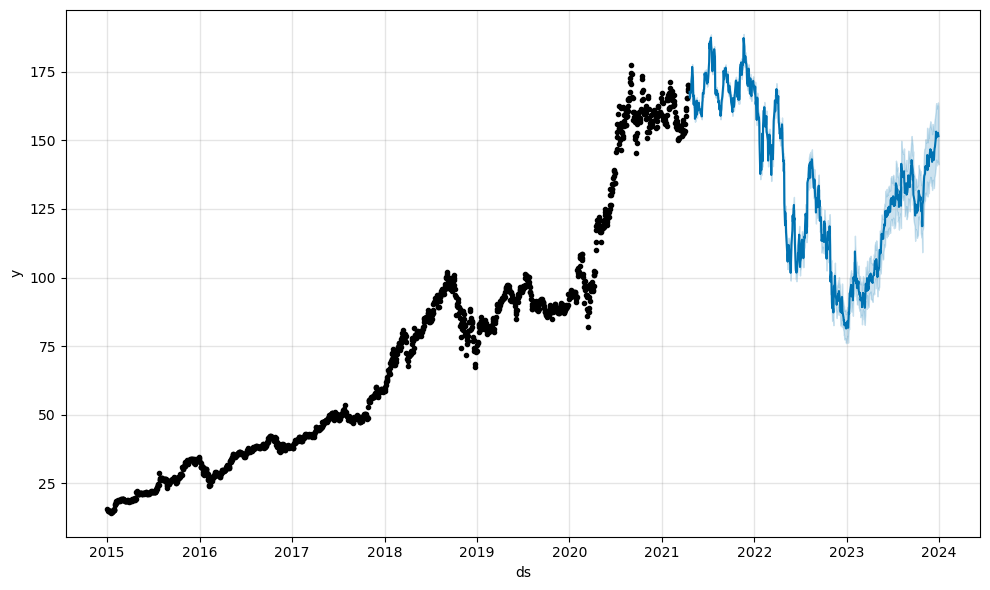

In [98]:
model.plot(forecast)
;

In [99]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close,Close_lower,Close_upper,High,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-20,1.382063,166.512634,168.719205,1.382063,1.382063,-98.915825,-98.915825,-98.915825,153.409277,...,-2.903510,-2.903510,-2.903510,-0.120859,-0.120859,-0.120859,0.0,0.0,0.0,167.648004
1,2021-04-21,1.380718,164.417007,166.627962,1.380718,1.380718,-99.726506,-99.726506,-99.726506,152.496437,...,-2.907066,-2.907066,-2.907066,-0.120194,-0.120194,-0.120194,0.0,0.0,0.0,165.498243
2,2021-04-22,1.379373,166.299123,168.545387,1.379373,1.379373,-98.154977,-98.154977,-98.154977,152.950352,...,-2.899971,-2.899971,-2.899971,-0.119179,-0.119179,-0.119179,0.0,0.0,0.0,167.448744
3,2021-04-23,1.378028,165.899250,168.139013,1.378028,1.378028,-99.099442,-99.099442,-99.099442,153.046948,...,-2.721106,-2.721106,-2.721106,-0.117858,-0.117858,-0.117858,0.0,0.0,0.0,167.023785
4,2021-04-26,1.373994,166.923891,169.117765,1.373994,1.373994,-101.120058,-101.120058,-101.120058,155.470759,...,-2.910760,-2.910760,-2.910760,-0.112642,-0.112642,-0.112642,0.0,0.0,0.0,168.015355


In [100]:
from sklearn.metrics import mean_squared_error 
prohet_mae = mean_squared_error(actual,forecast['yhat'])
prohet_mae

2.1994794315927653

In [ ]:
# Evaluate Model
prophet_mae = mean_absolute_error(actual,forecast['yhat'])
prophet_mse = mean_squared_error(actual,forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(actual,forecast['yhat']))
prophet_r2 = r2_score(actual,forecast['yhat'])

print('Mean Absolute Error:', prophet_mae)
print('Mean Square Error:', prophet_mse)
print('Root Mean Square Error:', prophet_rmse)
print('R2:', prophet_r2)

## Tensorflow LSTM Model

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os
import json

from plotly.subplots import make_subplots
from tensorflow import keras
#from yahooquery import Ticker
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


import sagemaker
import boto3
import os

boto3_session = boto3.session.Session()
boto3_client = boto3.client('s3')
region = boto3_session.region_name
role = sagemaker.get_execution_role()
session = sagemaker.Session()

bucket = session.default_bucket()
prefix = "sagemaker/capstone2.28.24"

%matplotlib inline

2024-03-28 18:04:55.910410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 18:04:55.910523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 18:04:58.819098: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 18:05:02.829607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 18:05:12.897595: W tensorflow/comp

In [37]:
amzn = yf.Ticker("AMZN")
df = amzn.history(start = '2015-01-01', end = '2023-12-31') 

df.pop('Dividends')
df.pop('Stock Splits');

In [38]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,55664000
2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,55484000
2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,70380000
2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,52806000
2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,61768000


In [39]:
test_split=round(len(df)*0.30)

In [40]:
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(1585, 5)
(679, 5)


## Data Preprocessing

Here I am going to leverage the MinMaxScaler for both trainging and testing datasets in order to smooth out divergence in the independent variables

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)

In [21]:
pd.DataFrame(df_for_training_scaled).to_csv("data/train.csv", index = False)
pd.DataFrame(df_for_testing_scaled).to_csv("data/test.csv", index = False)

### Upload data to S3

In [ ]:
prefix = 'sagemaker/capstone2.28.24/train' # S3 prefix (which folder will we use)
train_path = session.upload_data(os.path.join('data', 'train.csv'), key_prefix=prefix)

prefix = 'sagemaker/capstone2.28.24/test' # S3 prefix (which folder will we use)
test_path = session.upload_data(os.path.join('data', 'test.csv'), key_prefix=prefix)

In [24]:
train_path

's3://sagemaker-us-east-1-053987932055/sagemaker/capstone2.28.24/train/train.csv'

### Tenorflow Hyperparameter Tuning

https://github.com/aws/amazon-sagemaker-examples/blob/main/hyperparameter_tuning/tensorflow2_mnist/hpo_tensorflow2_mnist.ipynb

In [41]:
import sagemaker
import boto3
import os
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

boto3_session = boto3.session.Session()
boto3_client = boto3.client('s3')
region = boto3_session.region_name
role = sagemaker.get_execution_role()
session = sagemaker.Session()

bucket = session.default_bucket()
prefix = "sagemaker/capstone2.28.24"

In [42]:
train_path = 's3://sagemaker-us-east-1-053987932055/sagemaker/capstone2.28.24/train/train.csv'

In [43]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [44]:
hyperparameter_ranges = {
                            "batch-size": CategoricalParameter([32, 64, 128, 256]),
                            "epochs": CategoricalParameter([3, 5, 10, 20]),
                            'optimizer-type': CategoricalParameter(['adam', 'Adadelta'])
                        }  

In [45]:
from sagemaker.tensorflow import TensorFlow

estimator = TensorFlow(
    entry_point='hpo-LSTM-21.19.24.py',
    role=role,
    framework_version='2.3.0',
    script_mode = True,
    py_version='py37',
    instance_type='ml.c4.xlarge',
    instance_count=1)

In [46]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=1,
    objective_type=objective_type,
)

In [47]:
tuner.fit({"training": train_path})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating hyperparameter tuning job with name: tensorflow-training-240328-1806


...............................................................................................................................................................................!


## Train LSTM Model with best Hyperparameters from Tuning and Leverage Multi-Instance Training

Note intantce_type = 4 when creating the Tensorflow estimator

In [48]:
# Tuning job name
print(tuner.latest_tuning_job.name)

#tuner.best_estimator()
tuner.best_training_job()

tensorflow-training-240328-1806


'tensorflow-training-240328-1806-002-1960a835'

In [49]:
import pandas as pd

hpytuner = sagemaker.HyperparameterTuningJobAnalytics(tuner.latest_tuning_job.name)

full_df = hpytuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df["FinalObjectiveValue"] > -float("inf")]
    if len(df) > 0:
        df = df.sort_values("FinalObjectiveValue")
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest": min(df["FinalObjectiveValue"]), "highest": max(df["FinalObjectiveValue"])})
        pd.set_option("display.max_colwidth", None)  # Don't truncate TrainingJobName
    else:
        print("No training jobs have reported valid results yet.")

df

Number of training jobs with valid objective: 2
{'lowest': 0.03359999880194664, 'highest': 0.18070000410079956}


,batch-size,epochs,optimizer-type,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
0,"""64""","""20""","""adam""",tensorflow-training-240328-1806-002-1960a835,Completed,0.0336,2024-03-28 18:10:48+00:00,2024-03-28 18:19:47+00:00,539.0
1,"""128""","""5""","""Adadelta""",tensorflow-training-240328-1806-001-c1938533,Completed,0.1807,2024-03-28 18:07:09+00:00,2024-03-28 18:10:36+00:00,207.0


In [50]:
training_job = 'tensorflow-training-240328-1806-002-1960a835'

tf_tuner = TensorFlow.attach(training_job)

tf_tuner.hyperparameters()


2024-03-28 18:19:49 Starting - Found matching resource for reuse
2024-03-28 18:19:49 Downloading - Downloading the training image
2024-03-28 18:19:49 Training - Training image download completed. Training in progress.
2024-03-28 18:19:49 Uploading - Uploading generated training model
2024-03-28 18:19:49 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"64"',
 'epochs': '"20"',
 'optimizer-type': '"adam"',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"TensorFlow"',
 'sagemaker_estimator_module': '"sagemaker.tensorflow.estimator"',
 'sagemaker_job_name': '"tensorflow-training-2024-03-28-18-06-07-305"',
 'sagemaker_program': '"hpo-LSTM-21.19.24.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-053987932055/tensorflow-training-2024-03-28-18-06-07-305/source/sourcedir.tar.gz"',
 'model_dir': '"s3://sagemaker-us-east-1-053987932055/tensorflow-training-2024-03-28-18-06-07-305/model"'}

In [51]:
hyperparameters = tf_tuner.hyperparameters()

hyperparameters = {"batch-size": tf_tuner.hyperparameters()['batch-size'].replace('"','' ), \
                   "optimizer-type": tf_tuner.hyperparameters()['optimizer-type'].replace('"','' ),
                    "epochs" : tf_tuner.hyperparameters()['epochs'].replace('"', '')}
hyperparameters

{'batch-size': '64', 'optimizer-type': 'adam', 'epochs': '20'}

In [52]:
from sagemaker.tensorflow import TensorFlow
regressor_tf = TensorFlow(
    entry_point='train_LSTM.py',
    role=role,
    framework_version='2.3.0',
    script_mode = True,
    py_version='py37',
    instance_type='ml.c4.xlarge',
    # multi-instance training to 4
    instance_count= 4,
    hyperparameters=hyperparameters)


In [53]:
regressor_tf.fit({"training": train_path})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: tensorflow-training-2024-03-28-18-23-01-964


2024-03-28 18:23:03 Starting - Starting the training job...
2024-03-28 18:23:18 Starting - Preparing the instances for training......
2024-03-28 18:24:30 Downloading - Downloading the training image...
2024-03-28 18:25:01 Training - Training image download completed. Training in progress...2024-03-28 18:25:08,896 sagemaker-training-toolkit INFO     Imported framework sagemaker_tensorflow_container.training
2024-03-28 18:25:08,904 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-28 18:25:09,205 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-28 18:25:09,224 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-28 18:25:09,242 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-28 18:25:09,254 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_dir

In [6]:
from sagemaker.interactive_apps import tensorboard


app = tensorboard.TensorBoardApp(region)
print("Navigate to the following URL:")
print(
    app.get_app_url(
        training_job_name="tensorflow-training-2024-03-28-17-37-17-470", # Optional. Specify the name of the job to track.
        open_in_default_web_browser=False           # Set to False to print the URL to terminal.
    )
)


Navigate to the following URL:
https://us-east-1.console.aws.amazon.com/sagemaker/home?region=us-east-1#/tensor-board-landing/tensorflow-training-2024-03-28-17-37-17-470


## Deploy LSTM  Model

In [54]:
regressor_tf.model_data

's3://sagemaker-us-east-1-053987932055/tensorflow-training-2024-03-28-18-23-01-964/output/model.tar.gz'

In [55]:
from sagemaker.tensorflow import TensorFlowModel
model = TensorFlowModel(model_data='s3://sagemaker-us-east-1-053987932055/tensorflow-training-2024-03-28-18-23-01-964/output/model.tar.gz', role=role,framework_version='2.3.0')
predictor = model.deploy(initial_instance_count=1, instance_type='ml.c5.xlarge')

INFO:sagemaker.tensorflow.model:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating model with name: tensorflow-inference-2024-03-28-18-29-21-952
INFO:sagemaker:Creating endpoint-config with name tensorflow-inference-2024-03-28-18-29-22-673
INFO:sagemaker:Creating endpoint with name tensorflow-inference-2024-03-28-18-29-22-673


-----!

In [56]:
df = pd.read_csv('data/test.csv')

In [57]:
df.shape

(679, 5)

In [58]:
split=round(len(df)*0.5)

In [59]:
future = df[split:]
past = df[:split]

In [60]:
future.head()

,0,1,2,3,4
340,0.741836,0.753531,0.749772,0.757790,0.043244
341,0.749749,0.756045,0.726158,0.717537,0.077687
342,0.708960,0.719987,0.715350,0.711620,0.066324
343,0.717240,0.720723,0.703355,0.705086,0.068721
344,0.706200,0.711648,0.702668,0.693004,0.078396


In [61]:
future.shape

(339, 5)

In [62]:
past.shape

(340, 5)

In [63]:
actual = future['0']

In [64]:
future['0'] = np.nan

/tmp/ipykernel_19666/3425877546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['0'] = np.nan


In [65]:
full_df = pd.concat([pd.DataFrame(past),future])

In [66]:
full_array = full_df.values

In [ ]:
all_data=[]
time_step=30
for i in range(time_step,len(full_array)):
    data_x=[]
    data_x.append(full_array[i-time_step :i , 0:full_array.shape[1]])
    data_x=np.array(data_x)
    prediction=predictor.predict(data_x)
    infer = prediction['predictions'][0][0]
    all_data.append(infer)
    full_array[i,0]=infer

In [32]:
len(all_data[-339:])

339

In [33]:
len(actual)

339

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
# MSE
LSTM_MSE = mean_squared_error(all_data[-339:], actual)
mean_squared_error(all_data[-339:], actual)

0.4195996110734842

## Comparing Performance of all Models

In [120]:
print('MSE Basline Linear Regression Model:', baseline_mse)
print('MSE of Autoglon Model:', abs(perf['mean_squared_error']))
print('MSE of HPO Autoglon Model:', abs(hpo_perf['mean_squared_error']))
print('MSE of Prophet Model:', prohet_mse)
print('MSE of HPO LSTM Model:', LSTM_MSE)

MSE Basline Linear Regression Model: 1.0916151765857767e-09
MSE of Autoglon Model: 81.44673385599222
MSE of HPO Autoglon Model: 88.07604118054836
MSE of Prophet Model: 2.1994794315927653
MSE of HPO LSTM Model: 0.0016983404690519472


# The HPO LSTM Model is clearly the more performant model based on the performance metric of MSE